in this notebook we implement excercise 3, including pytorch

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.getcwd())
from helpers import *

In [3]:
import numpy as np
import torch
from helpers import *

# 2.1 Seeding
np.random.seed(42)
torch.manual_seed(42)

# section 3: ridge regression

create a table:
model, train, val, test acc

In [ ]:
# 3.1 Task & 3.2 Q1: Train and Plot Accuracy
lambdas = [0., 2., 4., 6., 8., 10.]
df_results, models_dict, (x_test, y_test) = run_ridge_grid_search(lambdas)

#### Q 3.2.1

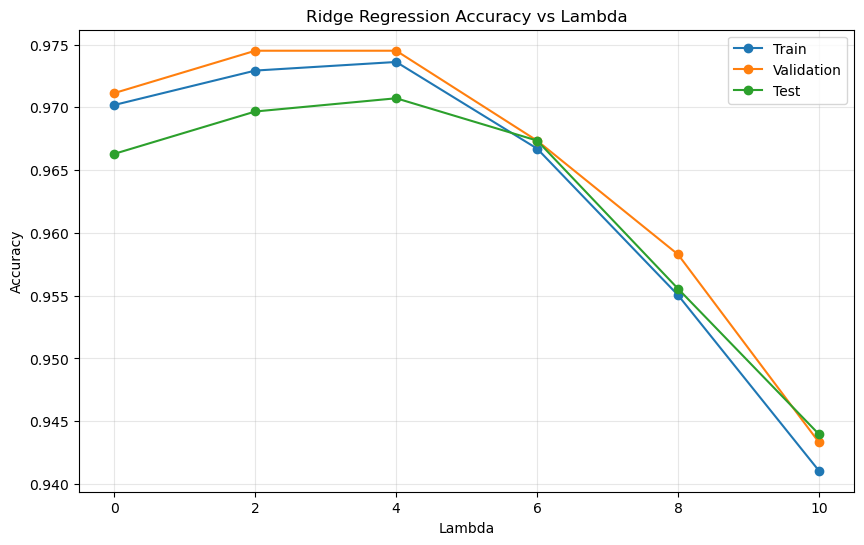

Best Model (Validation) Lambda: 2.0
Test Accuracy of Best Model: 0.9697


In [6]:
ridge_q1_plot_accuracies(df_results)

we clearly see a modest but notice able decrease in accuracy as we increased lambda. It seems the regularisation makes the model less expressive. the fact that the trend is identicalfor both trian and test, suggests the model didn't overfit

#### Q 3.2.2

Plotting Worst Model (Lambda=10.0)...


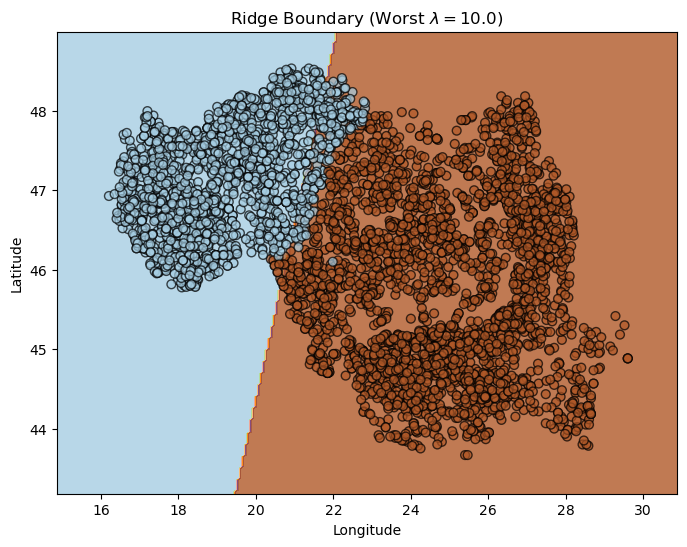

Plotting Best Model (Lambda=2.0)...


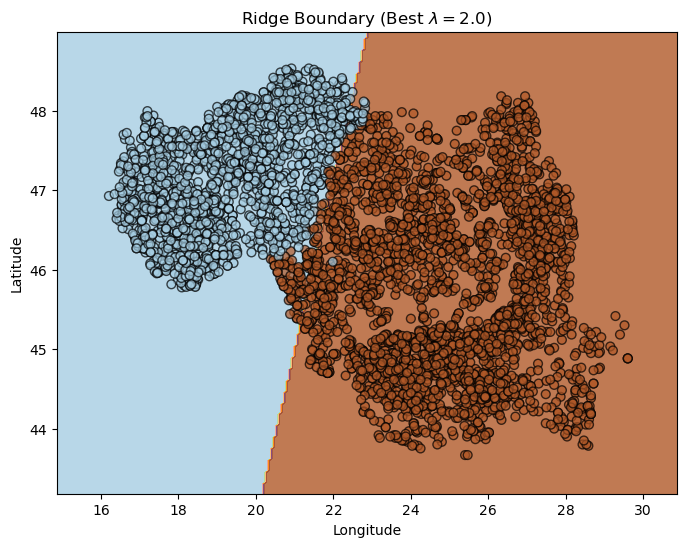

In [7]:
# 3.2 Q2: Visualize Best and Worst
ridge_q2_plot_boundaries(df_results, models_dict, x_test, y_test)

# [Write your commentary here about how lambda affects the boundary]

the diffenret lambdas shift the boundary. we see that in the best model the boundary intersects the Longitude at `20`, while in the worst model it does so at `19`.
we can examine the model params:


In [7]:
np.linalg.norm(best.W), np.linalg.norm(worst.W)

(np.float64(0.21831819714950573), np.float64(0.13142029697964172))

and see that as epected, the weigths in the worst model are smaller, due to the larger lambda. 

# section 4: numpy sgd output


### Explanation of the Math:
The function is $f(x, y) = (x - 3)^2 + (y - 5)^2$.
To minimize it, we compute the partial derivatives:
*   $\frac{\partial f}{\partial x} = 2(x - 3)$
*   $\frac{\partial f}{\partial y} = 2(y - 5)$

In every step, we subtract the gradient scaled by the learning rate from the current position. 
since the function is made of two squares, the global minimum is where both terms are 0, the point `(3,5)`:

Final point reached: (3.0000, 5.0000)


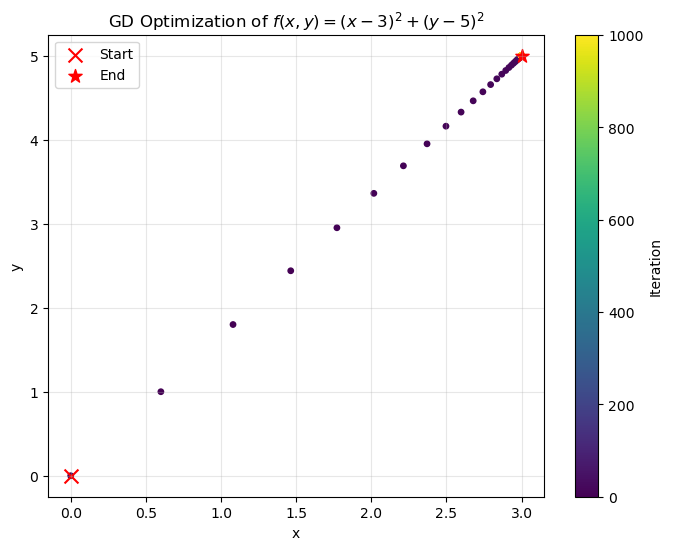

In [8]:
run_numpy_gd_experiment()


# section 6:  pytorch SGD logistic Regression

In [ ]:
binary_results, binary_test_df = train_binary_logistic_models()

Training Binary Models with LRs: [0.1, 0.01, 0.001]...


#### Q 6.3.1

Best Binary Model LR: 0.001
Validation Acc: 0.9760
Test Acc: 0.9705


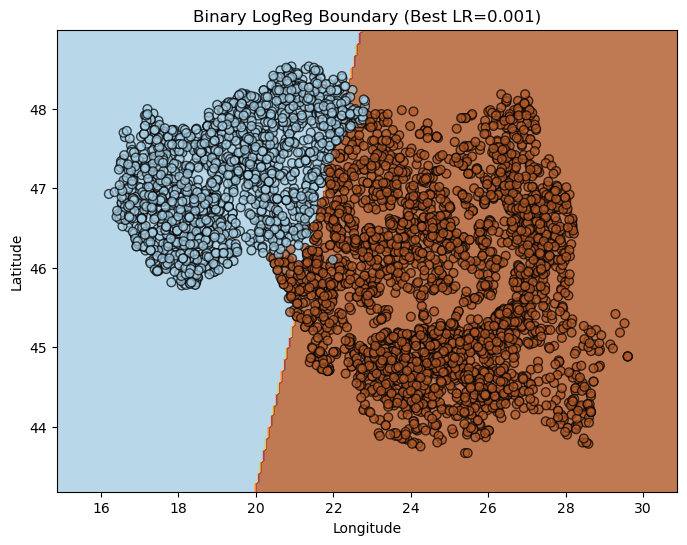

In [10]:
best_binary_lr = section_6_3_q1(binary_results, binary_test_df)

when we visualise the decision boundary we see a plot which is almost identical to the best analytically sovled ridge regressor.  

### Q 6.3.2:

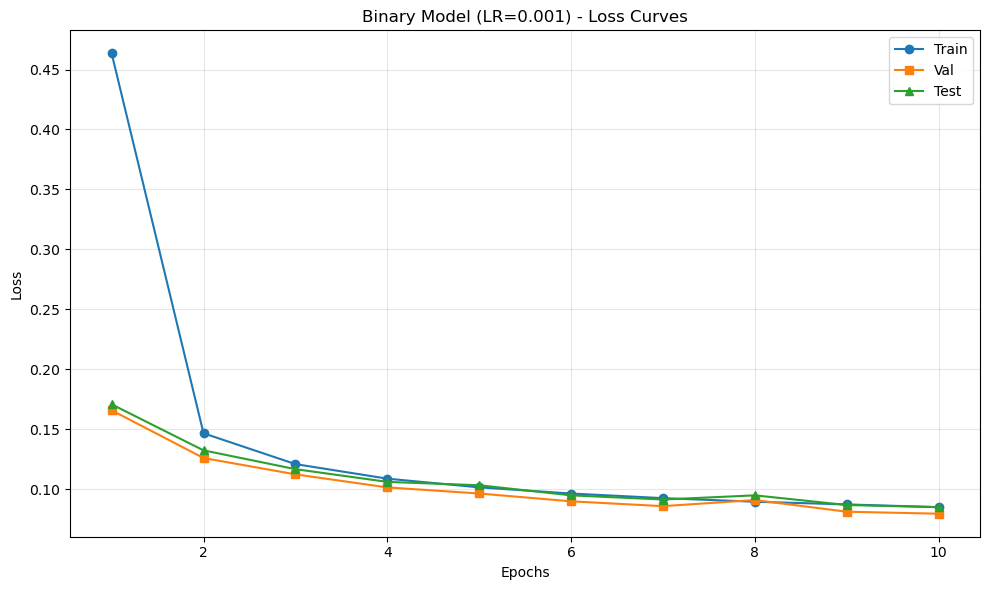

In [19]:
section_6_3_q2(binary_results, best_binary_lr)

since the test and train loss follow the same trajectory as the train loss, we conclude that the model generalised to the to test and val data

### Q 6.3.3:
we note that the best logistic model trained with SGD performed on par with the analytically solved best ridge regressor: val acc of `0.9705` vs `0.9745`. 
this stands to reason, since we on both cases we trained a linear regressor. and since the loss function is convex, sgd will necessarily arrive at a global minimum. 

## multi class

in this section we train a model on multiclass classification

In [13]:
multi_results, _ = train_multiclass_logistic_models()

Training Multi-class Models with LRs: [0.01, 0.001, 0.0003]...


#### Q 6.4.1

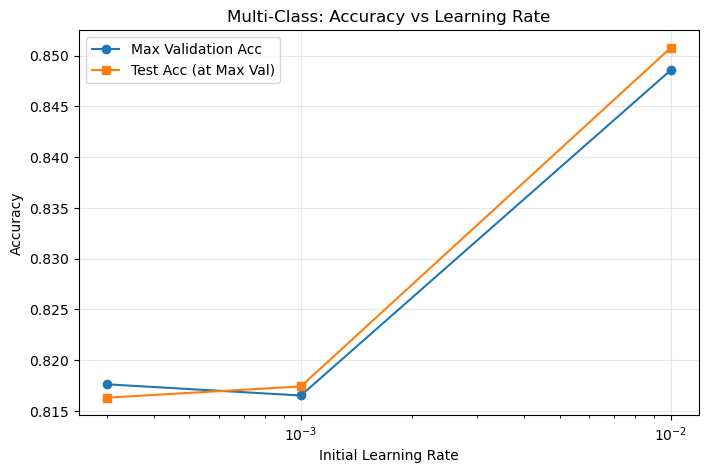

Best LR (by Validation): 0.01
Validation Acc: 0.8486
Test Acc: 0.8508


In [14]:
best_multi_lr = section_6_4_q1(multi_results)

clearly, to acheive optimal results, a lr of at lease 1e-2 was needed. both lower lr's didn't acheive the same result,s suggesting the would need more epochs to acheive the same results. 

### 6.4.2

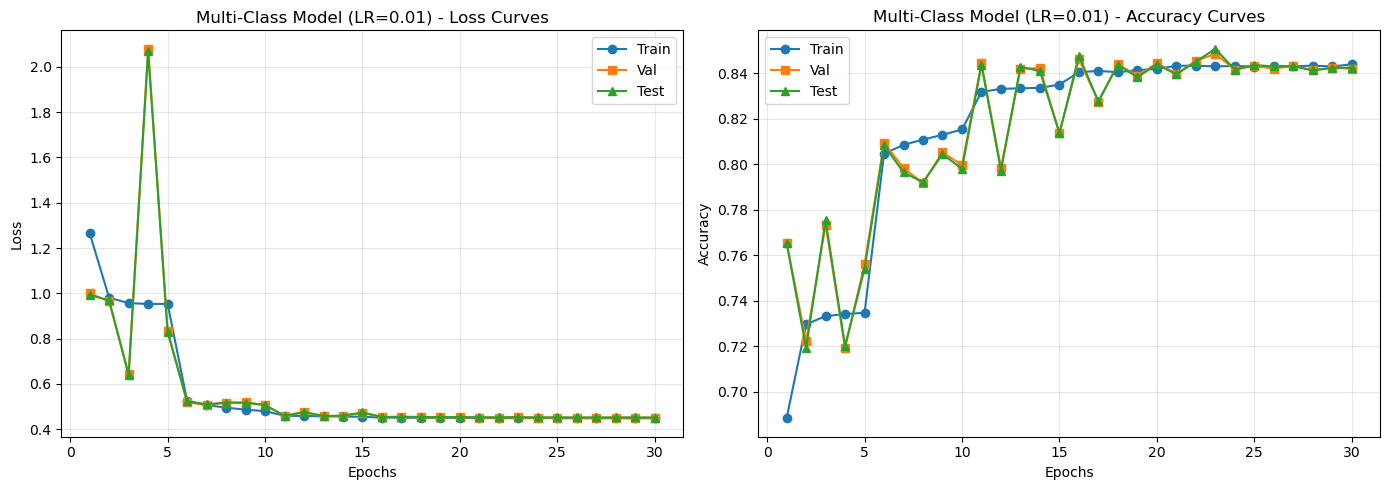

In [20]:
section_6_4_q2(multi_results, best_multi_lr)


we can say the model generalised, in the narrow sense that the generalisation gap is small, as can be seen from the overlap of the lines of train and test loss and acc respectively. although we see that it was only near the end that the model converged properly, showing the importance of decaying the larning rate. 

#### 6.4.3:  trees

we now train a tree based classifier on the same task, and we see that representaiton is very different

Decision Tree (Depth=2) Test Accuracy: 0.7502


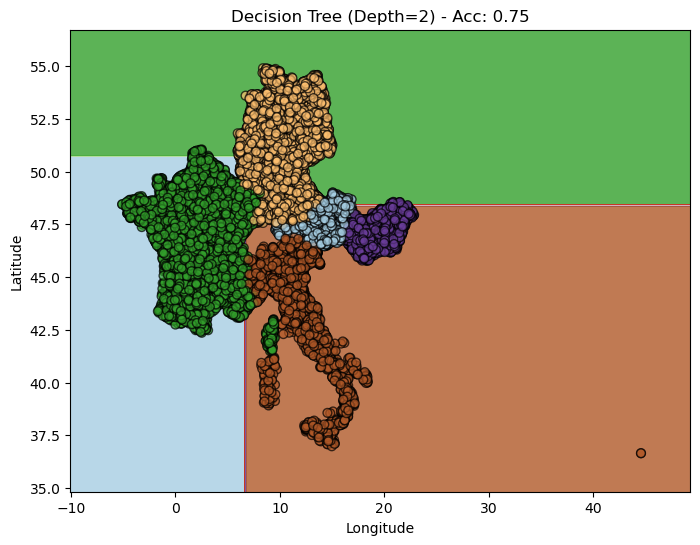

In [16]:
section_6_4_q3_tree_d2()


while the data is unsuitable for simple linear regression, meaning it isn' cleanly linearly seperable, the regressor slightly outperformed the tree. the main reason for this is the shallowness of the tree - a depth of two, menaing a maximum of 4 leavs. since the data can't be fitted to 4 rectangles, the tree is less suitbale.

#### 6.4.4

Decision Tree (Depth=10) Test Accuracy: 0.9969


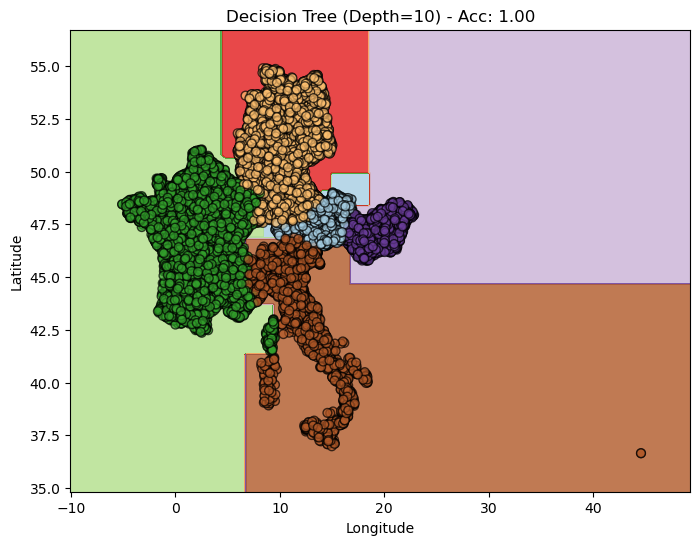

In [17]:
section_6_4_q4_tree_d10()


on the other hand, when we increase the depth (and thus leaves) the model can perform perfectly. since there are 5 classes with fairly clear boundaries, the model can easily find a set of leaves (rectangles) that match them

# AI usage

as an experinced numpy and pytorch practitioner, I used AI to assit the lerning process. I did the thinking, AI generated code and then i refined it. in this process i first wrote an interactive jupyter notebook to understnad each aspect and finally wrapped each section into its own function. for plots, I didn't review the plotting code, so much as the results. at the end i used gemini 3 to reorganise my code into fucntions for each question.